

**Author: M.UMESH KUMAR.
# **Data Science & Business Analytics Internship at The Sparks Foundation**
### **TASK 2 - Prediction using Unsupervised Machine Learning**

The  task is to predict the optimum number of clusters fron the 'Iris' dataset and represent it visually.

Steps to be followed:  
Step 1 - Importing the dataset  
Step 2 - Finding the optimum number of clusters  
Step 3 - Applying k means clustering on the data  
Step 4 - Visualising the clusters

### **STEP-1 Importing the data**



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
dataset = datasets.load_iris()
dataset = pd.DataFrame(dataset.data, columns = dataset.feature_names)

In [4]:
dataset.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [5]:
dataset.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### **STEP-2 Finding the optimum number of clusters**
We need to specify the number of clusters,Before clustering the data using kmeans,To find the minimum number of clusters, there are various methods available like Silhouette Coefficient and the Elbow method. Here, the elbow method is used.

**Silhouette Coefficient**:Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1]

**Elbow Method**:In this method, the number of clusters are varies within a certain range. For each number, within-cluster sum of square (wss) value is calculated and stored in a list. These value are then plotted against the range of number of clusters used before. The location of bend in the 2d plot indicates the appropiate number of clusters.

In [6]:
x = dataset.iloc[:, [0, 1, 2, 3]].values


within_cluster_sum_of_square = []

clusters_range = range(1,11)
for k in clusters_range:
    km = KMeans(n_clusters=k)
    km = km.fit(x)
    within_cluster_sum_of_square.append(km.inertia_)

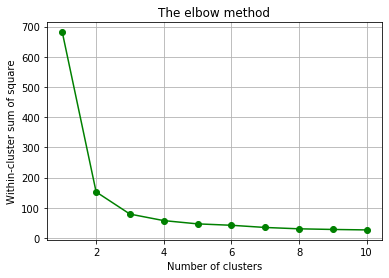

In [7]:
plt.plot(clusters_range, within_cluster_sum_of_square, 'go-', color='green')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of square')
plt.grid()
plt.show()

### **STEP-3 Applying k means clustering on the data**



In [74]:
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
predictions = model.fit_predict(dataset)

In [75]:
x = dataset.iloc[:, [0, 1, 2, 3]].values

### **STEP 4 : Visualising the Clusters**

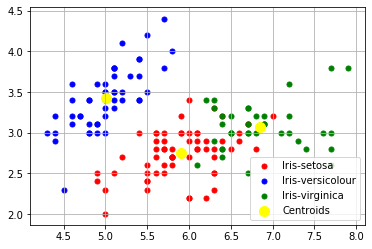

In [76]:
plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1], s = 25, c = 'red', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1], s = 25, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1], s = 25, c = 'green', label = 'Iris-virginica')

# Plotting the cluster centers

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.grid()
plt.show()


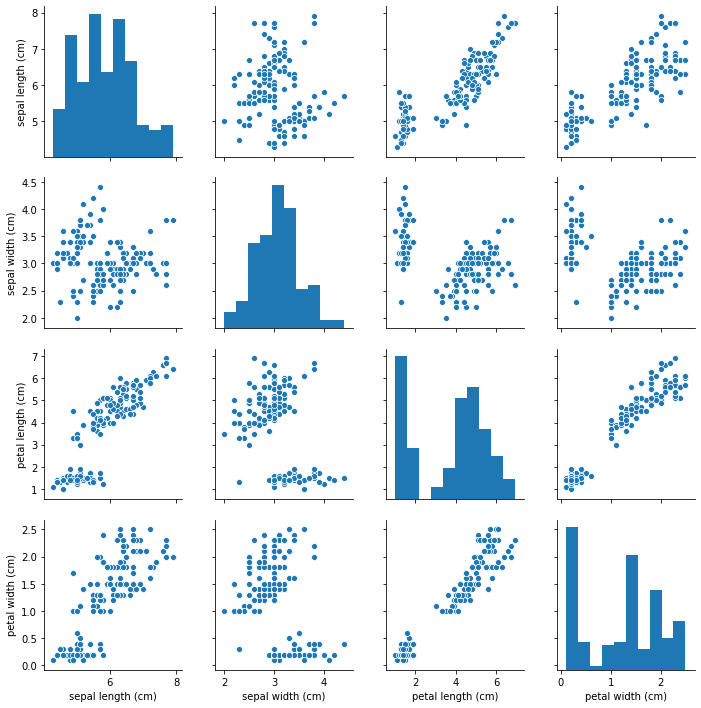

In [77]:
sns.pairplot(dataset,hue=None)

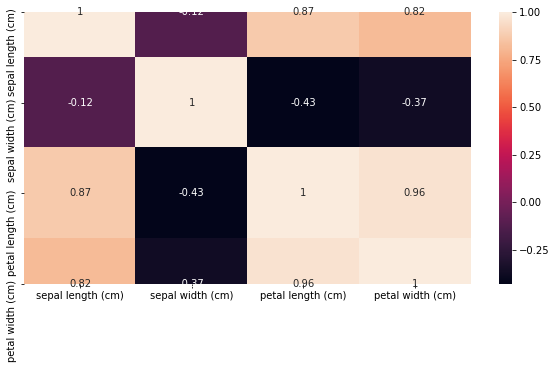

In [78]:
plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr(), annot=True)